In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement, product
from mpl_toolkits.mplot3d import Axes3D

# design matrix 
def designMatrix(M, d, arr):
    gen_monomials = []
    for degree in range(M + 1):
        for expo in combinations_with_replacement(range(d), degree):
            # print(exponents)
            power = [expo.count(i) for i in range(d)]
            # print(power)
            gen_monomials.append(power)

    design_matrix = []
    for arr_ele in arr:
        x = []
        for ele in gen_monomials:
            power = 1;
            for j in range(len(arr_ele)):
                power *= (arr_ele[j]**ele[j])
            x.append(power)
        design_matrix.append(x)
            
    return design_matrix

# parameters with regresion
def parameters_with_reg(design_matrix, output, lamb):
    D = len(design_matrix[0]);
    lambda_iden = lamb*np.identity(D)
    
    if not isinstance(design_matrix, np.ndarray):
        design_matrix = np.array(design_matrix)

    parameters = ((np.linalg.inv((design_matrix.T @ design_matrix)+lambda_iden) @ design_matrix.T) @ output)
    return parameters

# parameter without regression
def parameters_without_reg(design_matrix, output_vector):
    pseudo_inverse = np.linalg.pinv(design_matrix)
    parameter_vector = pseudo_inverse @ output_vector
    return parameter_vector

# Predict y values
def predict(x, M, d, param):
    dm = designMatrix(M, d, x)
    return dm @ param

# erms calculation
def cal_erms(y_pred, y_act):
    return np.sqrt(np.mean((y_pred - y_act) ** 2))

# plotting
def plotxy(X, y, y_pred, y_predreg):
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_pred, color = 'blue', label = 'Curvefit_without regularizer')
    plt.plot(X, y_predreg, color = "green", label = 'Curvefit_with regularizer')
    plt.scatter(X, y, color = 'orange', label = 'Training_Data')
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

def plotxy1(x,y,param,param_reg,M,d):
    x_fit=np.linspace(min(x)-1,max(x)+1,500)
    y_fit=predict(x_fit,M,d,param)
    y_fit_reg=predict(x_fit,M,d,param_reg)
    plt.scatter(x,y,color='orange',label='training_data')
    plt.plot(x_fit,y_fit,color='blue',label='Curvefit_without regularizer')
    plt.plot(x_fit,y_fit_reg,color='green',label='Curvefit_with regularizer')
    plt.grid(True)
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

# plotting 45degree line
def plotyy(y_actual, y_predicted):
    plt.scatter(y_actual, y_predicted, color = 'blue', label = 'Output')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    min_value = min(y_actual.min(), y_predicted.min())
    max_value = max(y_actual.max(), y_predicted.max())
    plt.plot([min_value, max_value], [min_value, max_value], linestyle = '--', color = 'red', label = '45-degree line')
    plt.grid(True)
    plt.legend()

In [144]:
# Reading file
import pandas as pd

df = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset2/Train-2b-100.csv')
print(df)
df = df.sort_values(by=['x1'])
x = df[['x1','x2']].to_numpy().reshape(-1,2)
y = df['output'].to_numpy().reshape(-1,1)
x,y


          x1        x2       output
0   0.589286 -1.910714 -8465.620091
1   1.160714 -0.875000    44.005424
2   1.500000  0.839286  5309.372669
3   0.017857  0.875000   741.990792
4  -1.178571  1.392857  1642.379360
..       ...       ...          ...
95  0.696429  0.732143  1210.796953
96 -1.196429  1.642857  3551.565039
97 -0.500000  0.589286   217.418523
98 -0.232143 -1.821429 -6701.040896
99  0.750000  0.910714  1852.291547

[100 rows x 3 columns]


(array([[-1.94642857,  1.82142857],
        [-1.875     ,  1.03571429],
        [-1.85714286,  1.46428571],
        [-1.83928571, -1.07142857],
        [-1.82142857, -0.94642857],
        [-1.80357143, -1.53571429],
        [-1.71428571,  1.42857143],
        [-1.67857143, -1.14285714],
        [-1.66071429, -1.44642857],
        [-1.57142857, -0.66071429],
        [-1.48214286, -0.14285714],
        [-1.42857143,  1.07142857],
        [-1.41071429, -1.25      ],
        [-1.39285714, -0.51785714],
        [-1.35714286,  0.23214286],
        [-1.33928571,  0.60714286],
        [-1.30357143, -0.48214286],
        [-1.28571429, -1.48214286],
        [-1.23214286, -1.58928571],
        [-1.21428571, -1.60714286],
        [-1.19642857,  1.64285714],
        [-1.17857143,  1.39285714],
        [-1.14285714, -1.80357143],
        [-1.08928571,  0.64285714],
        [-1.07142857, -1.55357143],
        [-1.03571429, -0.39285714],
        [-1.        , -0.23214286],
        [-0.94642857,  1.607

In [146]:
M=6
d=2
dm = designMatrix(M,d,x)
dm

[[1.0,
  -1.9464285714285716,
  1.8214285714285712,
  3.78858418367347,
  -3.545280612244898,
  3.317602040816326,
  -7.374208500364434,
  6.900635477405248,
  -6.4574754008746345,
  6.042775145772592,
  14.353370116780773,
  -13.431594054235216,
  12.569014619559558,
  -11.761830194450225,
  11.006483301228648,
  -27.937809691591152,
  26.143638426993547,
  -24.464689170214143,
  22.89356234276919,
  -21.42333356846291,
  20.047523155809323,
  54.37895100684707,
  -50.886724795398166,
  47.61876999202396,
  -44.56068384574718,
  41.69898855290102,
  -39.02107185684315,
  36.51513146236697],
 [1.0,
  -1.875,
  1.0357142857142856,
  3.515625,
  -1.9419642857142856,
  1.0727040816326527,
  -6.591796875,
  3.641183035714285,
  -2.0113201530612237,
  1.1110149416909616,
  12.359619140625,
  -6.827218191964285,
  3.771225286989795,
  -2.083153015670553,
  1.1506940467513531,
  -23.174285888671875,
  12.801034109933035,
  -7.071047413105865,
  3.905911904382287,
  -2.157551337658787,
  1.191

In [148]:
param = parameters_without_reg(dm, y)
param_reg= parameters_with_reg(dm,y,0.01)
param,param_reg

(array([[ 5.91640844e+01],
        [ 1.61796507e+02],
        [ 3.33444197e+02],
        [ 9.86038367e+01],
        [ 1.78530950e+02],
        [ 7.37164814e+01],
        [ 2.29670816e+02],
        [ 8.81080375e+01],
        [ 1.18535690e+02],
        [ 2.96137976e+02],
        [ 3.68788887e+01],
        [ 1.42222699e+02],
        [ 2.25854312e+02],
        [ 1.89302249e+02],
        [ 6.23687077e+00],
        [ 6.13870311e+01],
        [ 1.01601089e+02],
        [ 2.22603126e+02],
        [ 2.25440907e+02],
        [ 6.84765313e+01],
        [ 2.34857428e+02],
        [-7.08401941e-01],
        [ 4.21519979e-01],
        [ 1.49087981e+00],
        [ 1.80909165e-01],
        [ 1.40732174e+00],
        [ 5.21080084e-01],
        [ 8.88222431e-01]]),
 array([[ 5.91287447e+01],
        [ 1.61934351e+02],
        [ 3.33109799e+02],
        [ 9.86504024e+01],
        [ 1.78397532e+02],
        [ 7.37075098e+01],
        [ 2.29452183e+02],
        [ 8.83089791e+01],
        [ 1.18560613e+02],

In [150]:
# Reading file
import pandas as pd

df = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset2/Test-50.csv')
print(df)
df = df.sort_values(by=['x1'])

x_test = df[['x1','x2']].to_numpy().reshape(-1,2)
x1 = df['x1'].to_numpy().reshape(-1, 1)
x2 = df['x2'].to_numpy().reshape(-1, 1)
y_act = df['output'].to_numpy().reshape(-1,1)

y_pred_train = predict(x,M,d,param)
y_pred_train_reg = predict(x,M,d,param_reg)
y_pred = predict(x_test,M,d,param)
y_pred_reg = predict(x_test,M,d,param_reg)

print(len(y_pred),len(y_act))
y_act,y_pred,y_pred_reg

          x1        x2       output
0  -0.160714  1.375000  2406.950575
1   1.142857 -1.517857 -2982.631082
2  -0.410714  0.375000   117.960669
3   0.910714 -0.107143   452.596056
4  -0.446429 -1.035714  -825.810919
5   1.910714 -0.589286  3004.605816
6  -1.589286 -0.553571 -1714.487800
7   1.553571  0.767857  5258.413717
8   0.732143  0.339286   612.391941
9   1.428571 -1.928571 -8495.309503
10 -0.767857 -1.875000 -8302.860505
11 -0.107143 -1.785714 -6146.295076
12 -0.428571 -0.696429  -302.569090
13 -1.464286  1.482143  1678.165718
14  1.678571 -0.928571  1225.273165
15 -0.607143 -0.625000  -282.286871
16 -1.910714  1.625000  1282.342397
17  0.482143  0.035714   206.665112
18 -0.982143 -0.839286  -757.524367
19  1.696429 -0.089286  2687.064025
20 -1.017857  1.553571  2966.142783
21  0.071429  0.053571    90.855790
22 -1.928571 -0.767857 -4195.843180
23 -0.321429  0.750000   409.214051
24  0.946429 -0.714286    37.357378
25  0.607143 -1.357143 -2077.065795
26  0.517857 -0.500000   -37

(array([[-1.47626281e+03],
        [-1.86169633e+03],
        [-4.19584318e+03],
        [ 1.28234240e+03],
        [-1.81976399e+03],
        [-1.71448780e+03],
        [-8.70434253e+02],
        [ 1.67816572e+03],
        [ 2.96614278e+03],
        [-7.57524367e+02],
        [ 8.06360992e+02],
        [ 1.26186387e+03],
        [-8.30286051e+03],
        [-3.77512309e+01],
        [-2.82286871e+02],
        [-8.25810919e+02],
        [-3.02569090e+02],
        [ 1.17960669e+02],
        [ 4.09214051e+02],
        [ 7.20589627e+02],
        [ 2.40695057e+03],
        [-6.14629508e+03],
        [-7.80604406e+00],
        [-7.66315051e+02],
        [ 9.08557902e+01],
        [-1.97900877e+03],
        [ 2.06665112e+02],
        [ 6.27905817e+01],
        [-3.70331241e+01],
        [-2.07706580e+03],
        [ 1.04903725e+03],
        [-1.75828387e+02],
        [ 6.12391941e+02],
        [ 5.51654578e+03],
        [-1.44430403e+02],
        [ 2.45529750e+03],
        [ 4.52596056e+02],
 

In [152]:
erms= cal_erms(y_pred,y_act)
erms_reg = cal_erms(y_pred_reg,y_act)
erms,erms_reg

(5.4692792397811045, 5.484976833345704)

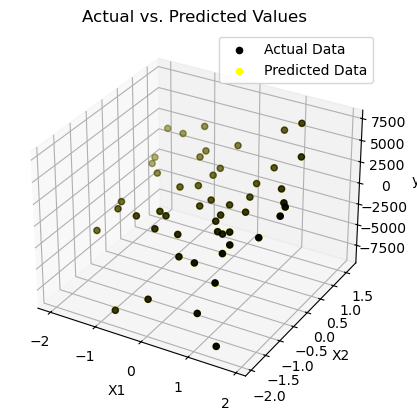

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter3D(x1, x2, y_act, color='black', label='Actual Data')

# Plot the predicted data points
ax.scatter3D(x1, x2, y_pred, color='yellow', label='Predicted Data')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Actual vs. Predicted Values without regression')

plt.legend()
plt.show()

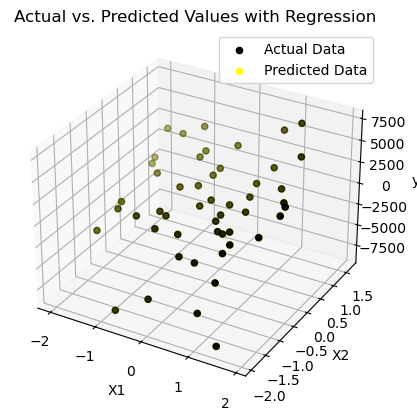

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter3D(x1, x2, y_act, color='black', label='Actual Data')

# Plot the predicted data points
ax.scatter3D(x1, x2, y_pred_reg, color='yellow', label='Predicted Data')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Actual vs. Predicted Values with Regression')

plt.legend()
plt.show()

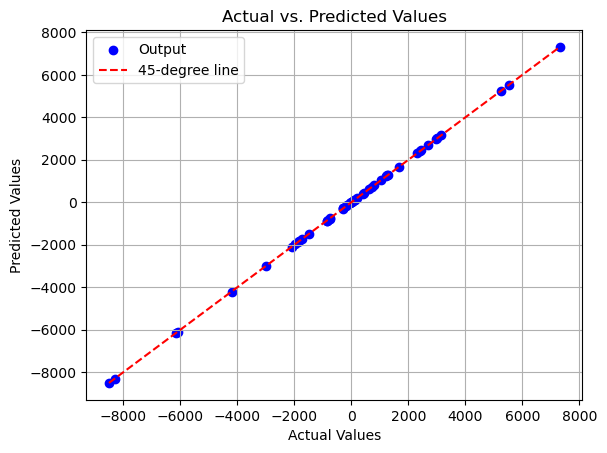

In [170]:
plotyy(y_act,y_pred)

For test data ( Without Regularization )

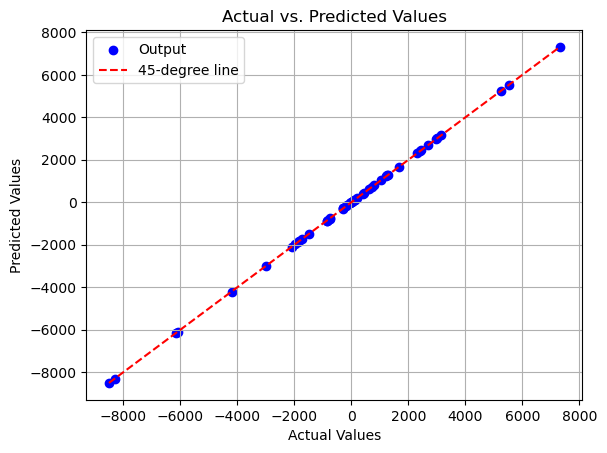

In [172]:
plotyy(y_act,y_pred_reg)

For test data ( With Regularization )

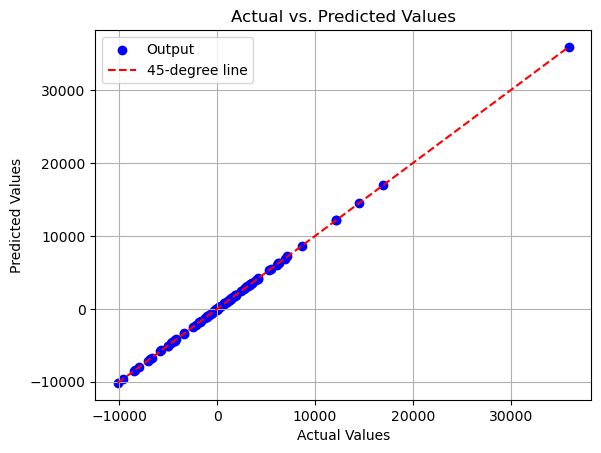

In [175]:
plotyy(y,y_pred_train)

For training data ( Without Regularization )

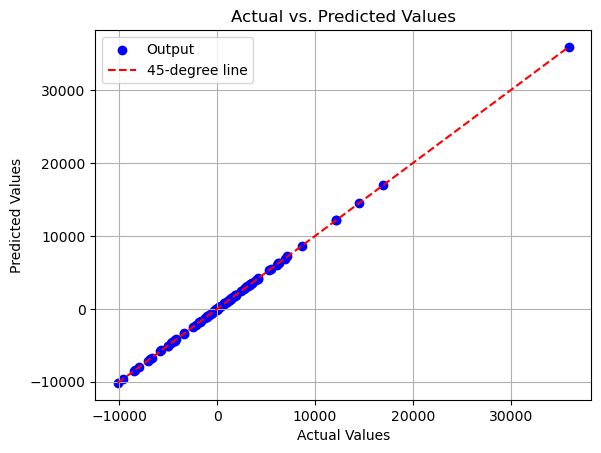

In [178]:
plotyy(y,y_pred_train_reg)

For training data ( With Regularization )